# Flight Activity Analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sb

print("---Libs Imported---")

---Libs Imported---


In [3]:
flight_activity = pd.DataFrame()

flight_activity = pd.read_csv('D:/airlne_loyality_project/data/customer_flight_activity.csv')

flight_activity.tail(10)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
392926,999986,2018,8,8,14680,22020.0,655,118
392927,999986,2018,11,6,4338,6507.0,0,0
392928,999986,2018,10,4,4588,6882.0,0,0
392929,999986,2018,2,1,1786,2679.0,544,98
392930,999986,2018,3,1,1069,1603.5,0,0
392931,999986,2018,4,0,0,0.0,0,0
392932,999986,2018,5,0,0,0.0,0,0
392933,999986,2018,6,0,0,0.0,0,0
392934,999986,2018,9,0,0,0.0,0,0
392935,999986,2018,12,0,0,0.0,0,0


# Data Checks 

In [4]:
flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [5]:
flight_activity = flight_activity.rename(columns={'Loyalty Number' : 'loyalty_number', 'Year' : 'year', 'Month' : 'month',
                                                  'Total Flights' : 'total_flights', 'Distance' : 'distance', 'Points Accumulated' : 'points_accumulated',
                                                    'Points Redeemed' : 'points_redeemed', 'Dollar Cost Points Redeemed': 'dollar_conversion_pts'})

flight_activity = flight_activity.sort_values(by=['month','year'], ascending=True).reset_index(drop=True)

# To reset the index error if it occurs
flight_activity = flight_activity.drop(columns=['level_0','index'], errors = 'ignore')

flight_activity.head()

,loyalty_number,year,month,total_flights,distance,points_accumulated,points_redeemed,dollar_conversion_pts
0,105932,2017,1,4,5108,5108.0,0,0
1,107212,2017,1,4,3572,3572.0,0,0
2,109552,2017,1,4,2356,2356.0,0,0
3,116703,2017,1,4,8932,8932.0,0,0
4,116999,2017,1,4,6252,6252.0,0,0


In [6]:
flight_activity['date_str'] = flight_activity['year'].astype(str) + '-' + flight_activity['month'].astype(str).str.zfill(2)

flight_activity['activity_date'] = pd.to_datetime(flight_activity['date_str'], format = '%Y-%m').dt.strftime('%Y-%m')

flight_activity.drop(columns = ['date_str','year','month'], inplace = True)

flight_activity.head(10)

,loyalty_number,total_flights,distance,points_accumulated,points_redeemed,dollar_conversion_pts,activity_date
0,105932,4,5108,5108.0,0,0,2017-01
1,107212,4,3572,3572.0,0,0,2017-01
2,109552,4,2356,2356.0,0,0,2017-01
3,116703,4,8932,8932.0,0,0,2017-01
4,116999,4,6252,6252.0,0,0,2017-01
5,118365,4,6800,6800.0,0,0,2017-01
6,121410,4,3644,3644.0,0,0,2017-01
7,121605,4,8644,8644.0,0,0,2017-01
8,122958,4,7836,7836.0,0,0,2017-01
9,127127,4,4052,4052.0,0,0,2017-01


In [7]:
new = ['loyalty_number', 'activity_date','total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_conversion_pts']

flight_activity = flight_activity.reindex(columns=new)

flight_activity.head(10)

,loyalty_number,activity_date,total_flights,distance,points_accumulated,points_redeemed,dollar_conversion_pts
0,105932,2017-01,4,5108,5108.0,0,0
1,107212,2017-01,4,3572,3572.0,0,0
2,109552,2017-01,4,2356,2356.0,0,0
3,116703,2017-01,4,8932,8932.0,0,0
4,116999,2017-01,4,6252,6252.0,0,0
5,118365,2017-01,4,6800,6800.0,0,0
6,121410,2017-01,4,3644,3644.0,0,0
7,121605,2017-01,4,8644,8644.0,0,0
8,122958,2017-01,4,7836,7836.0,0,0
9,127127,2017-01,4,4052,4052.0,0,0


# Analysis

In [8]:
monthly_summary = ( flight_activity.groupby('activity_date')
                   [['total_flights', 'distance', 'points_redeemed','dollar_conversion_pts']]
                   .sum().reset_index().sort_values(by = 'activity_date'))

monthly_summary.head(10)

,activity_date,total_flights,distance,points_redeemed,dollar_conversion_pts
0,2017-01,13059,19768451,351520,63293
1,2017-02,13368,19823241,357630,64389
2,2017-03,18391,27457411,445791,80246
3,2017-04,15449,23216906,417694,75197
4,2017-05,18690,27800124,468352,84306
5,2017-06,23504,35451679,578368,104121
6,2017-07,26312,39239457,589656,106155
7,2017-08,22976,34439663,545503,98197
8,2017-09,17439,26078732,477650,85987
9,2017-10,16458,24619641,440584,79313


In [9]:
avg_dist_per_flight = ( flight_activity.groupby('activity_date')
                   [['total_flights', 'distance']]
                   .sum().reset_index().sort_values(by = 'activity_date'))

avg_dist_per_flight['avg_dist_by_flight'] = (avg_dist_per_flight['distance'] / avg_dist_per_flight['total_flights']).round(0).astype(int)

avg_dist_per_flight.head(10)

,activity_date,total_flights,distance,avg_dist_by_flight
0,2017-01,13059,19768451,1514
1,2017-02,13368,19823241,1483
2,2017-03,18391,27457411,1493
3,2017-04,15449,23216906,1503
4,2017-05,18690,27800124,1487
5,2017-06,23504,35451679,1508
6,2017-07,26312,39239457,1491
7,2017-08,22976,34439663,1499
8,2017-09,17439,26078732,1495
9,2017-10,16458,24619641,1496


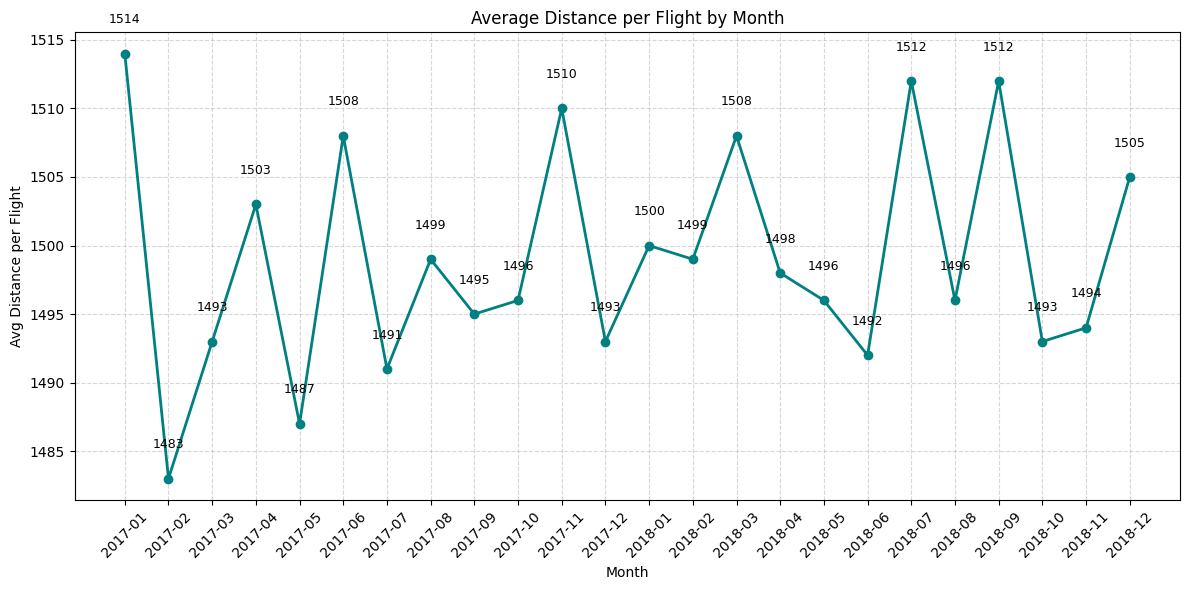

In [10]:
plt.figure(figsize=(12, 6))
x = avg_dist_per_flight['activity_date']
y = avg_dist_per_flight['avg_dist_by_flight']

# Line plot
plt.plot(x, y, marker='o', linewidth=2, color='teal')

# Annotate each point
for i, val in enumerate(y):
    plt.text(x[i], val + 2, f'{int(val)}', ha='center', va='bottom', fontsize=9, color='black')

# Formatting
plt.title('Average Distance per Flight by Month')
plt.xlabel('Month')
plt.ylabel('Avg Distance per Flight')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Points Summary of top 10 members by distance

pts_summary = (flight_activity.groupby('loyalty_number')['distance']
               .sum().reset_index().sort_values(by='distance',ascending=False).reset_index(drop = True))

pts_summary.head(10)

,loyalty_number,distance
0,689839,178858
1,893866,168640
2,500248,158747
3,775768,157231
4,133324,155877
5,471015,154784
6,385092,154288
7,201273,150231
8,208961,150188
9,556492,149782


In [12]:
# Points redeemed Summary of top 10 members

redeemed_summary = (flight_activity.groupby('loyalty_number')['points_redeemed']
               .sum().reset_index().sort_values(by='points_redeemed',ascending=False).reset_index(drop = True))

redeemed_summary.head(10)

,loyalty_number,points_redeemed
0,539704,4479
1,211755,4336
2,438707,4301
3,696609,4282
4,279419,4221
5,750688,4208
6,128467,4042
7,918807,3987
8,983393,3985
9,911525,3983


In [ ]:
# Points Summary of top 10 members by total

flights_summary = (flight_activity.groupby('loyalty_number')['total_flights']
               .sum().reset_index().sort_values(by='total_flights',ascending=False).reset_index(drop = True))

flights_summary.head(10)

,loyalty_number,total_flights
0,336882,106
1,813455,104
2,385092,102
3,983416,100
4,732304,98
5,110065,97
6,625320,96
7,464187,96
8,556492,95
9,775768,94
